# **Oil Price Prediction**

In [1]:
# 📊 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
# 🛠️ Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [3]:
# 🖥️ Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [4]:
# 📚 Assuming this class is defined in scripts/
from data_preprocessing import DataPreprocessor 

# 📏 Set figure size for visualizations
plt.rcParams['figure.figsize'] = (14, 7)

In [5]:
# 📂 Set the local path for loading the dataset
file_path = '../data/BrentOilPrices.csv'
print("📥 Loading data from:", file_path)

📥 Loading data from: ../data/BrentOilPrices.csv


In [6]:
oil_price_data= pd.read_csv(file_path)
print(oil_price_data.head())

        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


In [7]:
oil_price_data['Date'] = pd.to_datetime(oil_price_data['Date'], format='mixed')
print(oil_price_data.head())

        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


In [8]:
oil_price_data.set_index('Date', inplace=True)

# **Feature Engineering**

In [9]:
merged_data = pd.read_csv('../data/features.csv')

### **🌟 Create New Features from Oil Prices 🌟**

With the merged data, we can create new features from the oil prices to capture trends, volatility, and other useful characteristics. Here are some ideas:

**📈 Percentage Change**
+ Calculate daily percentage changes in oil prices to track how much the price fluctuates day-to-day.
  
**📊 Rolling Average**
+ Use rolling windows to create moving averages (e.g., 7-day, 30-day) to help visualize longer-term trends in oil prices.

**📉 Volatility**
+ Calculate the rolling standard deviation to measure oil price volatility, giving insights into price fluctuations over time.

**⚡ Momentum Indicators**
+ Create features such as price differences over different periods (e.g., 7-day, 30-day differences) to identify momentum and potential trading signals.


In [10]:
# 📈 Calculate Percentage Change
merged_data['Price_Pct_Change'] = merged_data['Price'].pct_change()  # Daily percentage change in oil prices
print("📊 Calculated daily percentage changes in oil prices.")

# 📊 Rolling Averages
# 7-day moving average
merged_data['Price_7D_MA'] = merged_data['Price'].rolling(window=7).mean()  
# 30-day moving average
merged_data['Price_30D_MA'] = merged_data['Price'].rolling(window=30).mean()  
print("📅 Created 7-day and 30-day moving averages for oil prices.")

# 📉 Rolling Volatility
# 7-day standard deviation for volatility
merged_data['Price_7D_Volatility'] = merged_data['Price'].rolling(window=7).std()  
# 30-day standard deviation for volatility
merged_data['Price_30D_Volatility'] = merged_data['Price'].rolling(window=30).std()  
print("📉 Calculated 7-day and 30-day rolling volatility (standard deviation) for oil prices.")

# ⚡ Price Momentum
# 7-day price difference
merged_data['Price_7D_Change'] = merged_data['Price'] - merged_data['Price'].shift(7)  
# 30-day price difference
merged_data['Price_30D_Change'] = merged_data['Price'] - merged_data['Price'].shift(30)  
print("⚡ Created 7-day and 30-day momentum indicators based on price changes.")

# ⏳ Lagged Features
# 7-day lagged change
merged_data['Price_7D_Lagged_Change'] = merged_data['Price'].diff(periods=7)  
# 30-day lagged change
merged_data['Price_30D_Lagged_Change'] = merged_data['Price'].diff(periods=30)  
print("⏳ Added 7-day and 30-day lagged features for oil price changes.")

📊 Calculated daily percentage changes in oil prices.
📅 Created 7-day and 30-day moving averages for oil prices.
📉 Calculated 7-day and 30-day rolling volatility (standard deviation) for oil prices.
⚡ Created 7-day and 30-day momentum indicators based on price changes.
⏳ Added 7-day and 30-day lagged features for oil price changes.


In [11]:
# 🧹 Remove rows with missing values
merged_data.dropna(inplace=True)
print("✅ Dropped rows with missing values.")

# 📅 Set 'Date' as the index
features = merged_data.set_index('Date')
print("📊 Set 'Date' as the index for the features DataFrame.")

# Display the features DataFrame
print("📈 Features DataFrame:")
features

✅ Dropped rows with missing values.
📊 Set 'Date' as the index for the features DataFrame.
📈 Features DataFrame:


,GDP,Exchange Rate,index,Price,Price_Pct_Change,Price_7D_MA,Price_30D_MA,Price_7D_Volatility,Price_30D_Volatility,Price_7D_Change,Price_30D_Change,Price_7D_Lagged_Change,Price_30D_Lagged_Change
Date,,,,,,,,,,,,,
1999-01-01,3.274709e+13,0.938283,2950.0,10.54,0.000000,10.212857,9.804333,0.301591,0.411555,0.63,0.83,0.63,0.83
1999-01-02,3.275013e+13,0.938679,2950.0,10.54,0.000000,10.302857,9.820667,0.289926,0.430909,0.63,0.49,0.63,0.49
1999-01-03,3.275316e+13,0.939074,2950.0,10.54,0.000000,10.392857,9.847667,0.241365,0.449986,0.63,0.81,0.63,0.81
1999-01-04,3.275620e+13,0.939470,2951.0,10.94,0.037951,10.540000,9.888000,0.209841,0.491398,1.03,1.21,1.03,1.21
1999-01-05,3.275924e+13,0.939866,2952.0,10.30,-0.058501,10.550000,9.907000,0.193649,0.496075,0.07,0.57,0.07,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-08,1.017709e+14,0.949624,9006.0,96.85,-0.030239,96.575714,93.685333,2.394910,2.984813,2.21,10.88,2.21,10.88
2022-11-09,1.017709e+14,0.949624,9007.0,93.05,-0.039236,96.540000,93.802000,2.453059,2.884312,-0.25,3.50,-0.25,3.50
2022-11-10,1.017709e+14,0.949624,9008.0,94.25,0.012896,96.415714,93.963333,2.556840,2.762986,-0.87,4.84,-0.87,4.84


In [12]:
# 📋 Copy your features DataFrame
data = features.copy()

# 📅 Ensure the date index is properly formatted
data.index = pd.to_datetime(data.index)

# 🔄 Create a complete date range and reindex
full_date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
data = data.reindex(full_date_range)

# 🔄 Fill missing values using forward fill
data.ffill(inplace=True)  # This will fill NaNs with the last valid observation
print("✅ Filled missing values using forward fill.")

# 📊 Proceed with your train-validation-test split
train_size = int(len(data) * 0.8)  # Adjust split ratio for train
validation_size = int(len(data) * 0.1)  # Adjust split ratio for validation (10% of total)

# 🔍 Define train, validation, and test sets
train = data.iloc[:train_size]
validation = data.iloc[train_size:train_size + validation_size]
test = data.iloc[train_size + validation_size:]

# ✅ Check for missing values after the split
print("📉 Missing Values in Train:", train.isnull().sum().sum())
print("📉 Missing Values in Validation:", validation.isnull().sum().sum())
print("📉 Missing Values in Test:", test.isnull().sum().sum())

# 📏 Print the sizes of the datasets
print(f"📊 Train Size: {len(train)}")
print(f"📊 Validation Size: {len(validation)}")
print(f"📊 Test Size: {len(test)}")

✅ Filled missing values using forward fill.
📉 Missing Values in Train: 0
📉 Missing Values in Validation: 0
📉 Missing Values in Test: 0
📊 Train Size: 6975
📊 Validation Size: 871
📊 Test Size: 873


## 🚀 **Build Model Pipeline**

### 📊 **Baseline Model - VAR (Vector Autoregression)**

Use **VAR** to capture the interdependencies between multiple time series (e.g., **GDP**, **Exchange Rate**, and **Oil Price**). 

#### 🔧 **Tune Parameters**
- Optimize the model's performance by selecting the appropriate lag order based on statistical criteria.

MSE: 342.60, RMSE: 18.51, MAE: 15.54


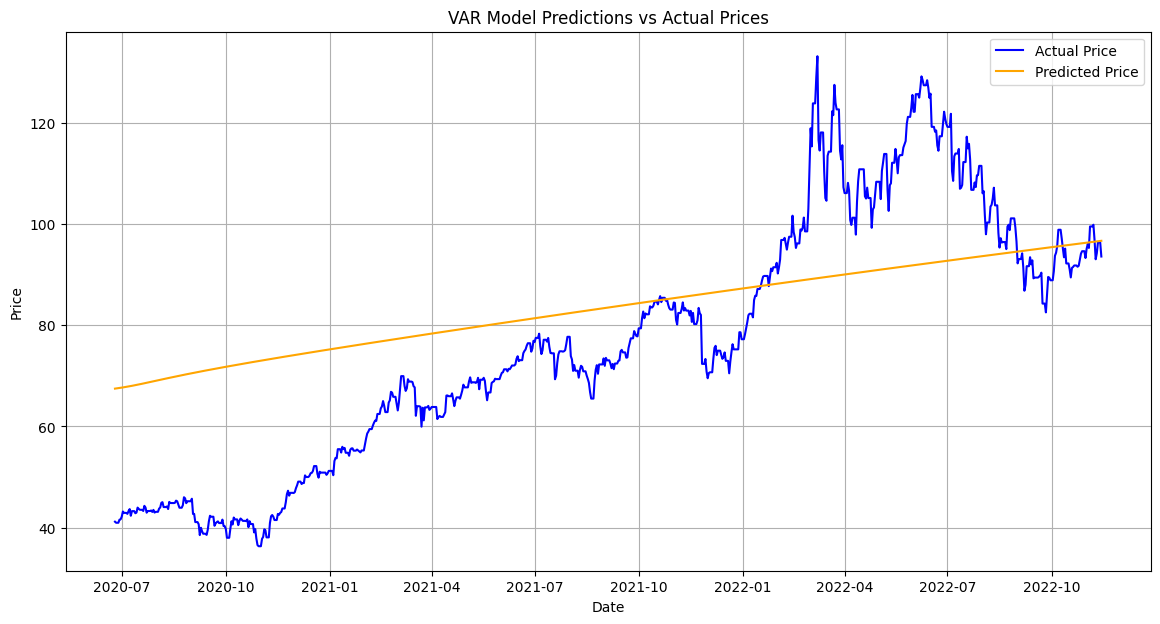

In [13]:
from statsmodels.tsa.api import VAR

# 🔧 Define VAR Model
def var_model(train, test):
    model = VAR(train)  # Initialize the VAR model
    model_fit = model.fit()  # Fit the model

    # 📏 Get the number of lags
    lag_order = model_fit.k_ar

    # 📅 Prepare the last 'lag_order' observations for forecasting
    last_obs = train.values[-lag_order:]

    # 📈 Forecast the future values
    forecast = model_fit.forecast(last_obs, steps=len(test))

    # 🗂️ Create a DataFrame for the predictions
    predictions = pd.DataFrame(forecast, index=test.index, columns=train.columns)

    # 📊 Evaluate the model's performance
    evaluate_model(predictions['Price'], test['Price'])

    return predictions

# 🎯 Define the evaluation function
def evaluate_model(predictions, actual):
    mse = np.mean((predictions - actual) ** 2)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    mae = np.mean(np.abs(predictions - actual))  # Mean Absolute Error

    # 📈 Print evaluation metrics
    print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}')

    # 📊 Plotting the results
    plt.figure(figsize=(14, 7))
    plt.plot(actual.index, actual, label='Actual Price', color='blue')
    plt.plot(predictions.index, predictions, label='Predicted Price', color='orange')
    plt.title('VAR Model Predictions vs Actual Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# 📈 Run the VAR model and get predictions
predictions_var = var_model(train, test)

MSE: 347.67, RMSE: 18.65, MAE: 15.49


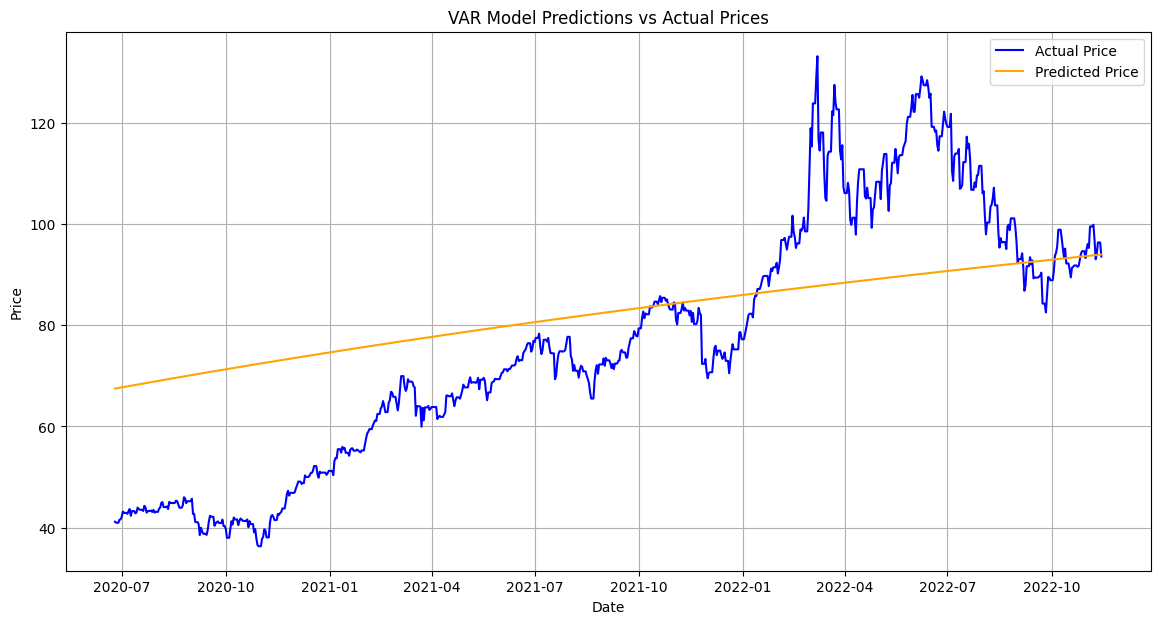

In [14]:
# 🔧 Define VAR Model
def var_model(train, test):
    # Initialize the VAR model with selected features
    model = VAR(train[['GDP', 'Exchange Rate', 'Price']])
    model_fit = model.fit()  # Fit the model

    # 📏 Get the number of lags
    lag_order = model_fit.k_ar

    # 📅 Prepare the last 'lag_order' observations for forecasting
    last_obs = train[['GDP', 'Exchange Rate', 'Price']].values[-lag_order:]

    # 📈 Forecast the future values
    forecast = model_fit.forecast(last_obs, steps=len(test))

    # 🗂️ Create a DataFrame for the predictions
    predictions = pd.DataFrame(forecast, index=test.index, columns=['GDP', 'Exchange Rate', 'Price'])

    # 📊 Evaluate the model's performance
    evaluate_model(predictions['Price'], test['Price'])

    return predictions

# 🎯 Define the evaluation function
def evaluate_model(predictions, actual):
    mse = np.mean((predictions - actual) ** 2)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    mae = np.mean(np.abs(predictions - actual))  # Mean Absolute Error

    # 📈 Print evaluation metrics
    print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}')

    # 📊 Plotting the results
    plt.figure(figsize=(14, 7))
    plt.plot(actual.index, actual, label='Actual Price', color='blue')
    plt.plot(predictions.index, predictions, label='Predicted Price', color='orange')
    plt.title('VAR Model Predictions vs Actual Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# 📈 Run the VAR model and get predictions
predictions_var = var_model(train, test)

# 📈 Advanced Time Series Models - SARIMAX

Use **SARIMAX** to capture seasonal patterns and trends in time series data while incorporating **exogenous variables**. 

### 🔧 Parameter Tuning
Tune **ARIMA** parameters (**p**, **d**, **q**) and seasonal parameters (**P**, **D**, **Q**, **s**) to model different price dynamics effectively.

### 📊 Model Evaluation
Evaluate model performance using metrics such as:
- **MSE** (Mean Squared Error)
- **RMSE** (Root Mean Squared Error)
- **MAE** (Mean Absolute Error)

### 📉 Visualization
Visualize the results to assess the model's predictive capabilities and understand its performance better.

d:\KAIM\Brent-Oil-Price-Change-Point-Analysis\cpavenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE: 111.72, RMSE: 10.57, MAE: 9.72


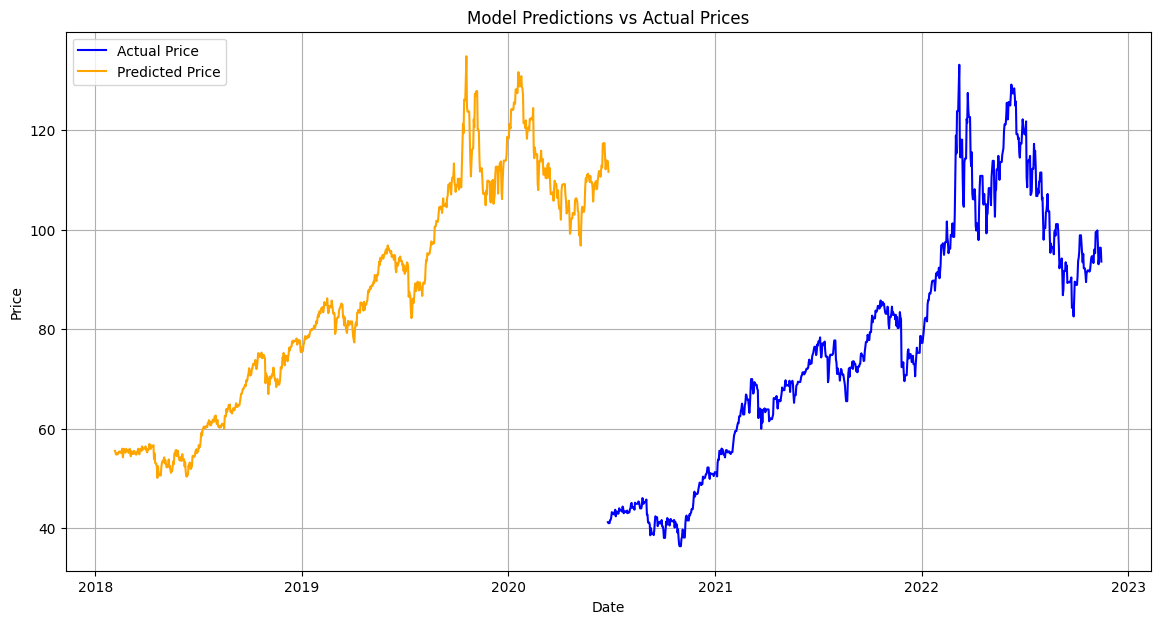

In [15]:
# 📦 Import necessary libraries
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 🎯 Function to evaluate the model
def evaluate_model(predictions, actual):
    mse = mean_squared_error(actual, predictions)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    mae = mean_absolute_error(actual, predictions)  # Mean Absolute Error

    # 📊 Print evaluation metrics
    print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}')

    # 📈 Plotting the results
    plt.figure(figsize=(14, 7))
    plt.plot(actual.index, actual, label='Actual Price', color='blue')
    plt.plot(predictions.index, predictions, label='Predicted Price', color='orange')
    plt.title('Model Predictions vs Actual Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# 🔧 Fit and evaluate SARIMAX model
def sarimax_model(train, test):
    # 📊 Define endogenous and exogenous variables
    y_train = train['Price']
    exog_train = train[['GDP', 'Exchange Rate', 'Price_Pct_Change',
                        'Price_7D_MA', 'Price_30D_MA',
                        'Price_7D_Volatility', 'Price_30D_Volatility',
                        'Price_7D_Change', 'Price_30D_Change']]

    y_test = test['Price']
    exog_test = test[['GDP', 'Exchange Rate', 'Price_Pct_Change',
                      'Price_7D_MA', 'Price_30D_MA',
                      'Price_7D_Volatility', 'Price_30D_Volatility',
                      'Price_7D_Change', 'Price_30D_Change']]

    try:
        # 🔍 Fit the SARIMAX model with adjusted parameters
        model = sm.tsa.SARIMAX(y_train,
                                exog=exog_train,
                                order=(1, 1, 1),   # Start simple
                                seasonal_order=(1, 1, 1, 12),  # Start simple for seasonality
                                enforce_stationarity=False,
                                enforce_invertibility=False)

        results = model.fit(maxiter=1000, disp=False, pgtol=1e-4)  # Adjust convergence settings

        # 📈 Forecasting the next values
        forecast = results.get_forecast(steps=len(test), exog=exog_test)
        predictions = forecast.predicted_mean

        # 📊 Evaluate the model's performance
        evaluate_model(predictions, y_test)

        return predictions

    except Exception as e:
        print(f"❌ An unexpected error occurred: {e}")

# 📊 Fit and evaluate the SARIMAX model
predictions_sarimax = sarimax_model(train, test)